In [ ]:
# New index with random cells of train / split

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [3]:
# If we change from 826 index to 1007 index. The val_acc changes drastically.

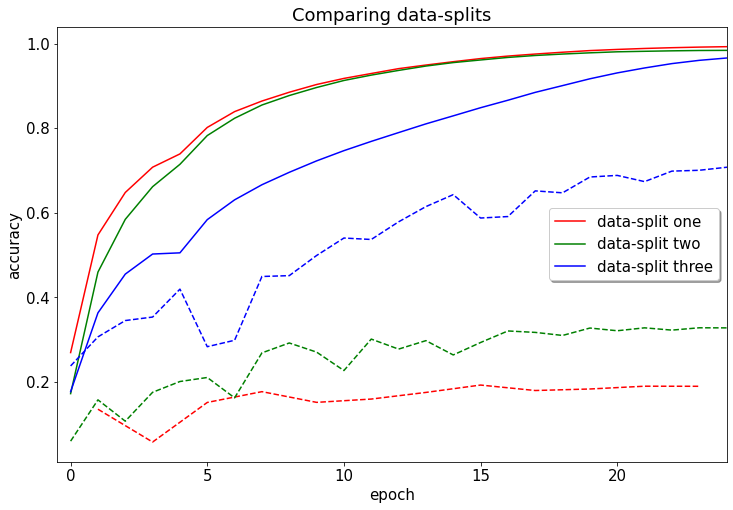

In [42]:
title="Comparing data-splits"
index1='813'
label_1='data-split one'
index2='827'
label_2='data-split two'
index3='1021'
label_3="data-split three"

plt.style.use({'figure.facecolor': 'white'})
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(12, 8))
plt.title(title)
plt.xlabel('epoch')

acc_path = '/Users/mbornhol/git/neural-profiling/training/results/accuracy/'
acc1 = pd.read_csv(acc_path + index1 + '.csv')
ax.plot(acc1['acc'], 'r', label=label_1)
ax.plot(acc1['val_acc'][np.isfinite(acc1['val_acc'])], 'r', linestyle='dashed')

if index2 != None:
    acc2 = pd.read_csv(acc_path + index2 + '.csv')
    ax.plot(acc2['acc'], 'g', label=label_2)
    ax.plot(acc2['val_acc'], 'g', linestyle='dashed')

if index3 != None:
    acc3 = pd.read_csv(acc_path + index3 + '.csv')
    ax.plot(acc3['acc'], 'b', label=label_3)
    ax.plot(acc3['val_acc'], 'b', linestyle='dashed')

ax.legend(loc='right', shadow=True)
ax.set_xlim([-0.5,24])
ax.set_ylabel('accuracy')
plt.show()

In [24]:
acc3.iloc[-1]

loss       0.4148
acc        0.9777
val_acc    0.7237
Name: 29, dtype: float64

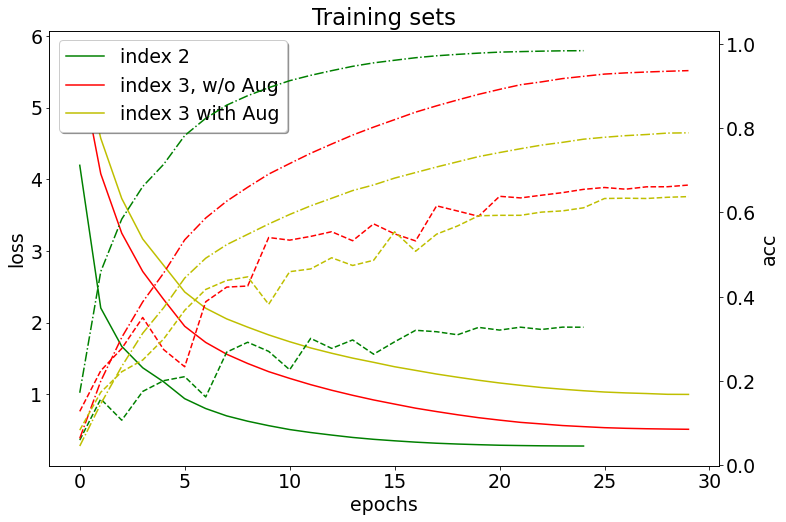

In [35]:
one = '827'
two = '1008'
three = '1010'
l_one = 'index 2'
l_two = 'index 3, w/o Aug'
l_three = 'index 3 with Aug'

acc_one = pd.read_csv(f'accuracy/{one}.csv')
acc_two = pd.read_csv(f'accuracy/{two}.csv')
acc_three = pd.read_csv(f'accuracy/{three}.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Training sets")
plt.xlabel('epochs')
ax2 = ax.twinx()
ax.plot(acc_one['loss'], 'g-', label = l_one)
ax2.plot(acc_one['acc'], 'g', linestyle='dashdot',label = 'acc' )
ax2.plot(acc_one['val_acc'], 'g', linestyle='dashed',label = 'val_acc')
ax.plot(acc_two['loss'], 'r-', label = l_two)
ax2.plot(acc_two['acc'], 'r', linestyle='dashdot',label = 'acc' )
ax2.plot(acc_two['val_acc'], 'r',linestyle='dashed', label = 'val_acc')
ax.plot(acc_three['loss'], 'y-', label = l_three)
ax2.plot(acc_three['acc'], 'y', linestyle='dashdot',label = 'acc' )
ax2.plot(acc_three['val_acc'], 'y',linestyle='dashed', label = 'val_acc')


ax.legend(loc = 'upper left', shadow=True)
ax.set_ylabel('loss')
ax2.set_ylabel('acc')
plt.show()

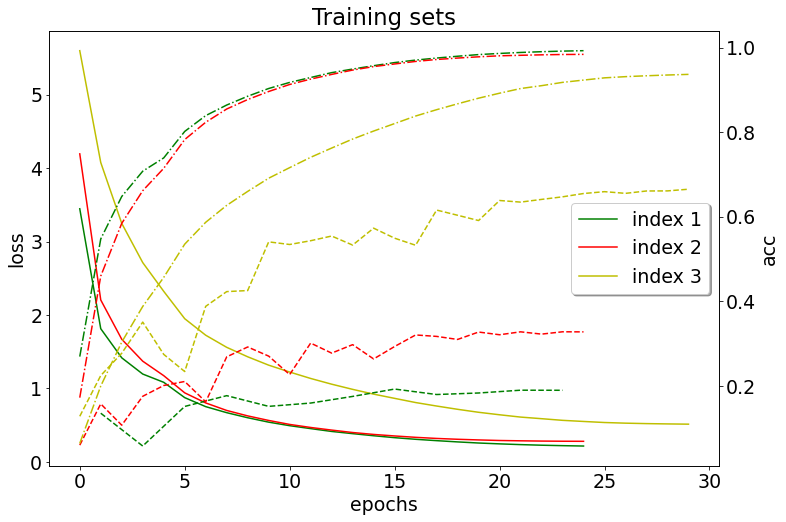

In [5]:
one = '813'
two = '827'
three = '1008'
l_one = 'index 1'
l_two = 'index 2'
l_three = 'index 3'

acc_one = pd.read_csv(f'accuracy/{one}.csv')
acc_two = pd.read_csv(f'accuracy/{two}.csv')
acc_three = pd.read_csv(f'accuracy/{three}.csv')



plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Training sets")
plt.xlabel('epochs')
ax2 = ax.twinx()
ax.plot(acc_one['loss'], 'g-', label = l_one)
ax2.plot(acc_one['acc'], 'g', linestyle='dashdot',label = 'acc' )
ax2.plot(acc_one['val_acc'][np.isfinite(acc_one['val_acc'])], 'g', linestyle='dashed',label = 'val_acc')
ax.plot(acc_two['loss'], 'r-', label = l_two)
ax2.plot(acc_two['acc'], 'r', linestyle='dashdot',label = 'acc' )
ax2.plot(acc_two['val_acc'], 'r',linestyle='dashed', label = 'val_acc')
ax.plot(acc_three['loss'], 'y-', label = l_three)
ax2.plot(acc_three['acc'], 'y', linestyle='dashdot',label = 'acc' )
ax2.plot(acc_three['val_acc'][np.isfinite(acc_three['val_acc'])], 'y',linestyle='dashed', label = 'val_acc')


ax.legend(loc = 'right', shadow=True)
ax.set_ylabel('loss')
ax2.set_ylabel('acc')
plt.show()

In [12]:
one = '813'
two = '827'
three = '1008'
l_one = 'index 1'
l_two = 'index 2'
l_three = 'index 3'

res1 = pd.read_csv(f'/Users/mbornhol/git/neural-profiling/training/runs/{one}/{one}_results.csv')
res2 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/827/827_25_results.csv')
res3 = pd.read_csv(f'/Users/mbornhol/git/neural-profiling/training/runs/{three}/results.csv')

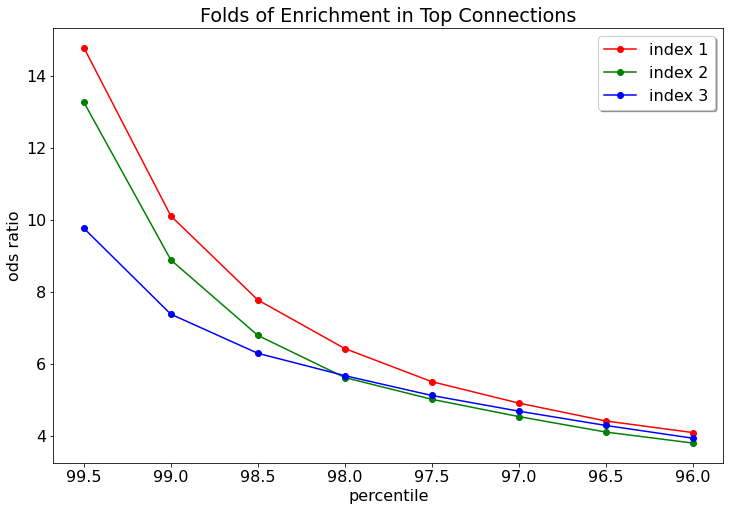

In [13]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res1["enrichment_percentile"], res1["ods_ratio"], marker="o", color="red", label = l_one)
plt.plot(100*res2["enrichment_percentile"], res2["ods_ratio"], marker="o", color="green", label = l_two)
plt.plot(100*res3["enrichment_percentile"], res3["ods_ratio"], marker="o", color="blue", label = l_three)
# plt.plot(100*df812_out_enr["enrichment_percentile"], df812_out_enr["ods_ratio"], marker="o", color="orange", label = 'out of index')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

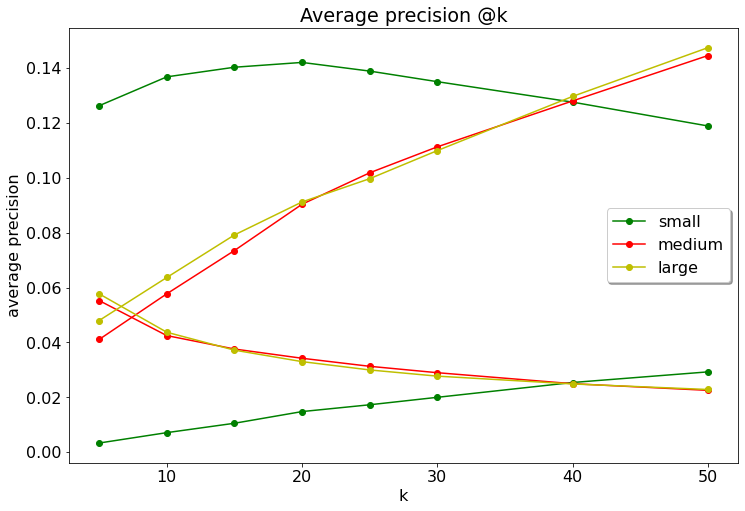

In [14]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res1["k"], res1["precision"], marker="o", color="green", label = 'small')
plt.plot(res1["k"], res1["recall"], marker="o", color="g")
plt.plot(res2["k"], res2["precision"], marker="o", color="r", label = 'medium')
plt.plot(res2["k"], res2["recall"], marker="o", color="red")
plt.plot(res3["k"], res3["precision"], marker="o", color="y", label = 'large')
plt.plot(res3["k"], res3["recall"], marker="o", color="y")
# plt.plot(base_pre_out["k"], base_pre_out["precision"], marker="o", color="y", label = 'out')
# plt.plot(base_pre_out["k"], base_pre_out["recall"], marker="o", color="y")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [28]:
d ={}
acc_path = '/Users/mbornhol/git/neural-profiling/training/results/accuracy/'
for file in os.listdir(acc_path):
    acc = pd.read_csv(acc_path + file)
    d[file] = acc['val_acc'].iloc[-1]

In [33]:
d

{'1012.csv': 0.6403,
 '1007.csv': 0.4678,
 '1013.csv': 0.6813,
 '1011.csv': 0.6115,
 '1010.csv': 0.6376,
 '1028.csv': 0.6372,
 '1014.csv': 0.4945,
 '813.csv': nan,
 '1029.csv': 0.6425,
 '811.csv': 0.1896,
 '1016.csv': 0.6487,
 '903.csv': 0.1725,
 '917.csv': 0.3134,
 '916.csv': 0.1522,
 '902.csv': 0.1724,
 '928.csv': 0.3245,
 '901.csv': 0.2533,
 '915.csv': 0.1469,
 '929.csv': 0.2972,
 '1103.csv': 0.6511,
 '1102.csv': 0.9468,
 '910.csv': 0.1708,
 '1101.csv': 0.7373,
 '913.csv': 0.1524,
 '922.csv': 0.3239,
 '923.csv': 0.2728,
 '826_2.csv': 0.2645,
 '921.csv': 0.2113,
 '920.csv': 0.254,
 '930.csv': 0.2198,
 '918.csv': 0.3423,
 '806_2.csv': nan,
 '919.csv': 0.2704,
 '925.csv': 0.296,
 '931.csv': 0.2694,
 '927.csv': 0.3319,
 '806_1.csv': 0.7293,
 '926.csv': 0.4653,
 '1027.csv': 0.7208,
 '1026.csv': 0.7137,
 '1024.csv': 0.6549,
 '1018.csv': 0.6253,
 '822.csv': 0.3208,
 '1019.csv': 0.7823,
 '1025.csv': 0.609,
 '1009.csv': 0.6461,
 '1021.csv': 0.7237,
 '827.csv': 0.3277,
 '1020.csv': 0.9041,
 '

In [37]:
import operator

sorted(d.items(), key=operator.itemgetter(1))

[('915.csv', 0.1469),
 ('916.csv', 0.1522),
 ('913.csv', 0.1524),
 ('910.csv', 0.1708),
 ('902.csv', 0.1724),
 ('903.csv', 0.1725),
 ('811.csv', 0.1896),
 ('921.csv', 0.2113),
 ('930.csv', 0.2198),
 ('901.csv', 0.2533),
 ('920.csv', 0.254),
 ('826_2.csv', 0.2645),
 ('831.csv', 0.2649),
 ('931.csv', 0.2694),
 ('919.csv', 0.2704),
 ('923.csv', 0.2728),
 ('925.csv', 0.296),
 ('929.csv', 0.2972),
 ('917.csv', 0.3134),
 ('822.csv', 0.3208),
 ('922.csv', 0.3239),
 ('928.csv', 0.3245),
 ('827.csv', 0.3277),
 ('825.csv', 0.3277),
 ('927.csv', 0.3319),
 ('819.csv', 0.3386),
 ('918.csv', 0.3423),
 ('926.csv', 0.4653),
 ('1007.csv', 0.4678),
 ('1014.csv', 0.4945),
 ('1022.csv', 0.5088),
 ('1025.csv', 0.609),
 ('1011.csv', 0.6115),
 ('1018.csv', 0.6253),
 ('1028.csv', 0.6372),
 ('1010.csv', 0.6376),
 ('1012.csv', 0.6403),
 ('1029.csv', 0.6425),
 ('1009.csv', 0.6461),
 ('1016.csv', 0.6487),
 ('1103.csv', 0.6511),
 ('1008.csv', 0.665),
 ('1013.csv', 0.6813),
 ('813.csv', nan),
 ('1024.csv', 0.6549),

In [40]:
acc = pd.read_csv(acc_path + '1102.csv')

In [41]:
acc

,loss,acc,val_acc
0,2.5976,0.4170,0.4606
1,1.6811,0.5956,0.5879
2,1.4524,0.6553,0.5507
3,1.3810,0.6804,0.6678
4,1.4986,0.6698,0.6085
5,1.3183,0.7284,0.6198
6,1.2260,0.7560,0.6033
7,1.1550,0.7764,0.7072
8,1.0992,0.7915,0.5876
9,1.0471,0.8054,0.7103
